# Recorte 1985 - 2002

In [1]:
# Importando bibliotecas necessárias para a construção de grafos
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import pandas as pd
import numpy as np
import csv
import ast
import cpnet
from graph_tool import spectral
import seaborn as sns
import regression as reg
import cpnet

from scipy import stats
from matplotlib import pyplot as plt
from graph_tool import centrality
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [2]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.dropna(subset=['Publisher'], inplace=True)
df = df.loc[~df['Critic_Score'].isna() & ~df['User_Score'].isna() & ~df['Rating'].isna()]

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
df_recortado = df.loc[(df['Year_of_Release'] >= 1985) & (df['Year_of_Release'] <= 2002)] 

In [5]:
df_recortado.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,95.0,54.0,8.4,314.0,Polyphony Digital,E
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M
52,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,96.0,16.0,8.7,138.0,Polyphony Digital,E
65,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.0,20.0,9.2,1282.0,SquareSoft,T


In [6]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 24 to 16677
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             892 non-null    object 
 1   Platform         892 non-null    object 
 2   Year_of_Release  892 non-null    float64
 3   Genre            892 non-null    object 
 4   Publisher        892 non-null    object 
 5   NA_Sales         892 non-null    float64
 6   EU_Sales         892 non-null    float64
 7   JP_Sales         892 non-null    float64
 8   Other_Sales      892 non-null    float64
 9   Global_Sales     892 non-null    float64
 10  Critic_Score     892 non-null    float64
 11  Critic_Count     892 non-null    float64
 12  User_Score       892 non-null    float64
 13  User_Count       892 non-null    float64
 14  Developer        892 non-null    object 
 15  Rating           892 non-null    object 
dtypes: float64(10), object(6)
memory usage: 118.5+ KB


In [7]:
df_recortado.Year_of_Release.value_counts()

2002.0    455
2001.0    256
2000.0    102
1999.0     30
1998.0     25
1997.0     13
1996.0      7
1994.0      1
1985.0      1
1992.0      1
1988.0      1
Name: Year_of_Release, dtype: int64

In [8]:
publishers = df_recortado["Publisher"].unique()

In [9]:
sixth_console_generation_graph = Graph(directed=False) # não-dirigido
sixth_console_generation_graph.add_vp('Publisher')
sixth_console_generation_graph.add_vp('Games_released')
sixth_console_generation_graph.add_ep('strength')

for pub in publishers:
    sixth_console_generation_graph.add_vertex(pub)
    sixth_console_generation_graph.get_vertex(pub)['Publisher'] = pub
    num_games = df_recortado['Name'].loc[df_recortado["Publisher"] == pub].nunique() 
    sixth_console_generation_graph.get_vertex(pub)['Games_released'] = num_games

In [10]:
sorted_years = list(range(1985, 2003))
print(sorted_years)

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]


In [11]:
df_list = []

margem = 4
for i in range(0, len(sorted_years), margem):
    df_list.append(df_recortado[df_recortado['Year_of_Release'].isin(sorted_years[i:i+margem])])

In [12]:
publisher_platforms = []
for db in df_list:
    publisher_platforms.append(db.groupby('Platform')['Publisher'].unique().to_dict())

In [13]:
for platform_dict in publisher_platforms:
    for platform, publishers in platform_dict.items():
        for i in range(len(publishers)):
            if i != len(publishers)-1:
                next_vertex = i+1
                while(next_vertex < len(publishers)):
                    if(publishers[i] != publishers[next_vertex] and not sixth_console_generation_graph.has_edge(publishers[i], publishers[next_vertex])):
                        sixth_console_generation_graph.add_edge(publishers[i], publishers[next_vertex])
                        sixth_console_generation_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] = 1
                        next_vertex += 1
                    else:
                        sixth_console_generation_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] += 1
                        next_vertex += 1

In [14]:
print('número de vértices de g:', sixth_console_generation_graph.num_vertices())

número de vértices de g: 84


In [15]:
print('número de arestaas de g:', sixth_console_generation_graph.num_edges())

número de arestaas de g: 1912


In [16]:
gt_save(sixth_console_generation_graph, 'sixth_console_generation_graph.net.gz')

In [17]:
g = gt_load('sixth_console_generation_graph.net.gz')
g = gt_clean(g)
cc = centrality.closeness(g)
g.add_vp('closeness', cc)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'sixth_console_generation_sfdp.net.gz')

In [18]:
r = netpixi.render('sixth_console_generation_sfdp.net.gz', infinite=True);

In [19]:
r.vertex_scale('Games_released', 20, 50)
r.edge_scale('strength', 0.3, 4)
r.vertex_default(color=0xff8674, kscale = 4, bwidth=3, bcolor=0x000000)
r.edge_default(curve1=1, curve2=1)
r.vertex_set_key('Publisher')

In [20]:
r.vertex_scale('closeness', 10, 50)
r.vertex_set_key('Publisher')

# Análise

<AxesSubplot: xlabel='Global_Sales', ylabel='Count'>

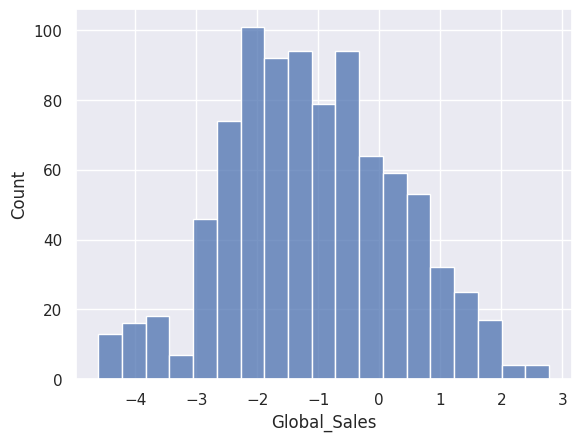

In [21]:
sns.histplot(np.log(df_recortado['Global_Sales']))

# Proximidade X Sucesso

In [22]:
df_pro_suc = df_recortado.copy()

In [23]:
g = gt_load("sixth_console_generation_sfdp.net.gz")

In [24]:
data = gt_data(g)
data.drop('Games_released', axis=1, inplace=True)
data.head()

,Publisher,closeness
id,,
Take-Two Interactive,Take-Two Interactive,0.931818
Sony Computer Entertainment,Sony Computer Entertainment,0.796117
SquareSoft,SquareSoft,0.621212
Nintendo,Nintendo,0.630769
Electronic Arts,Electronic Arts,0.987952


In [25]:
df_pro_suc = pd.merge(df_pro_suc, data, on = "Publisher", how = "inner")
df_pro_suc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             891 non-null    object 
 1   Platform         891 non-null    object 
 2   Year_of_Release  891 non-null    float64
 3   Genre            891 non-null    object 
 4   Publisher        891 non-null    object 
 5   NA_Sales         891 non-null    float64
 6   EU_Sales         891 non-null    float64
 7   JP_Sales         891 non-null    float64
 8   Other_Sales      891 non-null    float64
 9   Global_Sales     891 non-null    float64
 10  Critic_Score     891 non-null    float64
 11  Critic_Count     891 non-null    float64
 12  User_Score       891 non-null    float64
 13  User_Count       891 non-null    float64
 14  Developer        891 non-null    object 
 15  Rating           891 non-null    object 
 16  closeness        891 non-null    float64
dtypes: float64(11), 

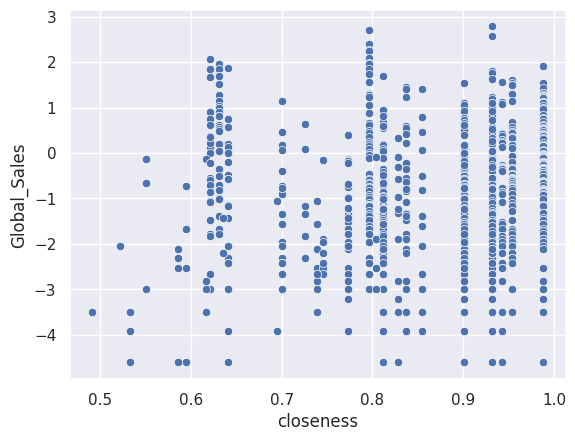

In [26]:
sns.scatterplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']));

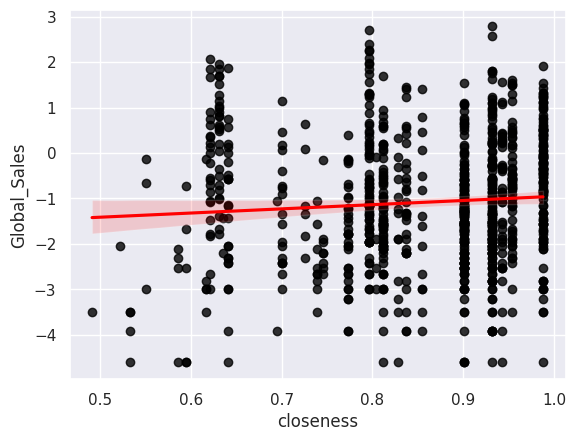

In [27]:
sns.regplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']), scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [28]:
result = reg.linear(data=df_pro_suc, formula='np.log(Global_Sales) ~ closeness')

In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Global_Sales)   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                  0.004
Method:                   Least Squares   F-statistic:                     4.851
Date:                  Tue, 15 Nov 2022   Prob (F-statistic):             0.0279
Time:                          14:52:03   Log-Likelihood:                -1561.0
No. Observations:                   891   AIC:                             3126.
Df Residuals:                       889   BIC:                             3136.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8711      0.361     -5.188      0.000      -2.579      -1.163
closeness      0.9180      0.417      2.202      0.028       0.100       1.736
==============================================================================
Omnibus:                        2.652   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.518
Skew:                           0.076   Prob(JB):                        0.284
Kurtosis:                       2.788   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
result.micro_summary()

variable,coefficient,std error,p-value
closeness,0.918044,0.416826,0.027889


In [31]:
result.nano_summary()

+0.918 (0.417) **


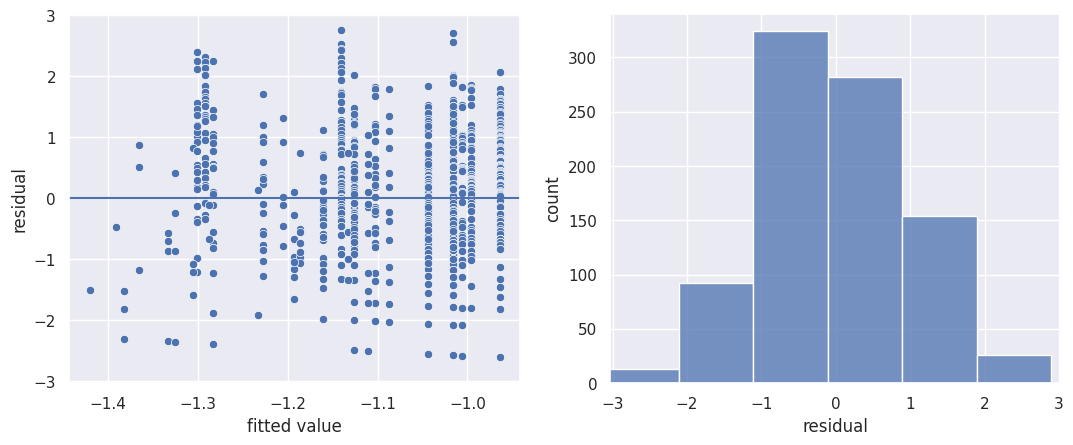

In [32]:
result.plot_residuals()